# Chi Squared Tests

Chi-Squared Tests (Uji Chi-Kuadrat) adalah salah satu uji statistik non-parametrik yang paling sering digunakan. Uji ini sangat berguna ketika Anda bekerja dengan data kategorikal, yaitu data yang dapat ditempatkan dalam kategori atau kelompok.

Konsep Utama:

Ide dasar di balik uji Chi-Kuadrat adalah membandingkan frekuensi yang diamati (data aktual yang Anda kumpulkan) dengan frekuensi yang diharapkan (frekuensi yang Anda harapkan jika hipotesis nol benar).

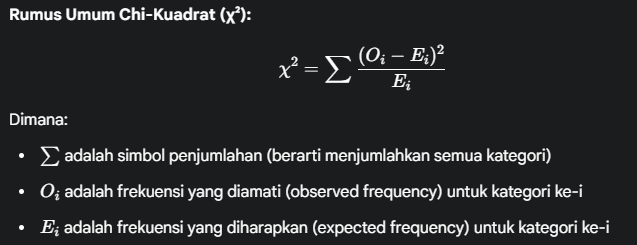

<b>Jenis-Jenis Uji Chi-Kuadrat yang Umum:</b>

1. Uji Chi-Kuadrat Goodness-of-Fit (Kesesuaian):

- Tujuan: Untuk menentukan apakah distribusi frekuensi yang diamati dari satu variabel kategorikal cocok dengan distribusi yang diharapkan atau yang diasumsikan.
- Contoh: Anda mungkin ingin menguji apakah sebuah dadu adil. Anda melempar dadu 60 kali dan mencatat berapa kali setiap angka muncul. Frekuensi yang diharapkan adalah 10 kali untuk setiap angka (jika dadu adil). Uji goodness-of-fit akan membantu Anda menentukan apakah frekuensi yang diamati secara signifikan berbeda dari yang diharapkan.
- Hipotesis:
$ H_0 $: Distribusi yang diamati cocok dengan distribusi yang diharapkan.
$ H_1 $: Distribusi yang diamati tidak cocok dengan distribusi yang diharapkan.

2. Uji Chi-Kuadrat Independensi:

- Tujuan: Untuk menentukan apakah ada hubungan atau asosiasi antara dua variabel kategorikal. Dengan kata lain, apakah kedua variabel tersebut saling bebas (independent) atau tidak.
- Contoh: Anda ingin mengetahui apakah ada hubungan antara jenis kelamin (laki-laki/perempuan) dan preferensi warna (merah/biru/hijau). Anda mengumpulkan data dari sampel orang dan melihat berapa banyak laki-laki yang menyukai merah, berapa banyak perempuan yang menyukai biru, dan seterusnya. Uji independensi akan membantu Anda menentukan apakah preferensi warna bersifat independen dari jenis kelamin.
- Hipotesis:
$ H_0 $: Kedua variabel kategorikal bersifat independen (tidak ada hubungan).
$ H_1 $: Kedua variabel kategorikal tidak independen (ada hubungan/asosiasi).

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import ttest_1samp # one t test
from scipy.stats import ttest_ind # two t test
from scipy.stats import ttest_rel # paired t test

In [2]:
data = pd.read_csv('train.csv')

data.shape

(1460, 81)

##  Goodness-of-Fit Test

In [4]:
# creating tow dataframes called national and state

national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["other"]*35000)

state = pd.DataFrame(["white"]*600 + ["hispanic"]*300 +\
                     ["black"]*250 + ["other"]*150)

# Perform cross-tabulation to create frequency table
national_table = pd.crosstab(index=national[0], columns="count")
state_table = pd.crosstab(index=state[0], columns="count")

# Print the frequency tables
print( "National")
print(national_table)
print( "Minnesota")
print(state_table)

National
col_0      count
0               
black      50000
hispanic   60000
other      35000
white     100000
Minnesota
col_0     count
0              
black       250
hispanic    300
other       150
white       600


## Test of Independence

In [5]:
import scipy.stats as sp

def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print('Frequency table')
    print('=============================')
    print(freqtab)
    print('=============================')
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print('ChiSquare test statistic: ', chi2)
    print('p-value: ', pval)
    return

# chi squared test
price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008282
